In [116]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
# 激活函数
def relu(X):
    return np.maximum(0, X)

def sigmod(Z):
    return 1 / (1 + np.exp(-Z))

# 神经元线性函数
def linear(X, w, b):
    return np.dot(w,X) + b

In [180]:
# 随机参数初始化
def initialize_parameters(layer_dims):
    '''
    layer_dims: 每层网络的神经单元数列表
    '''
    parameters = {}
    np.random.seed(1)
    lenth = len(layer_dims)
    for l in range(1, lenth):
        # 防止初始化的值过大
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1)) 
        
    return parameters    

In [294]:
# 前向传播
def forward_propagation(X, parameters):
    '''
    X: 输入向量
    parameters: 参数字典
    '''
    caches = []
    costs = []
    A = X
    
    L = len(parameters) // 2
    
    for l in range(1,L):
        w = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = linear(A, w, b)
        # 存储反向传播要用的参数
        caches.append((A,w,b,Z))
        A = relu(Z)
        
    w = parameters["W" + str(L)]
    b = parameters["b" + str(L)]
    Z = linear(A,w, b)
    caches.append((A, w, b, Z))
    
    A = sigmod(Z)
    
    return A, caches

In [189]:
# 代价函数
def compute_cost(A,Y):
    m = Y.shape[0]
    #cost = 1. / m * np.sum(np.multiply(-np.log(A), Y) + np.multiply(-np.log(1 - A), 1 - Y))
    #cost = np.squeeze(cost)
    # 平方差代价函数
    cost =  1. / m * np.sum(np.square(A - Y))
    #print(cost)
    return cost

In [181]:
# 激活函数求导
def relu_backward(dA, Z):
    result = np.multiply(dA, np.int64(Z > 0))
    return result

# 神经元线性函数求导
def linear_backward(dZ, cache):
    A_prev, w, b, z = cache
    dw = np.dot(dZ, A_prev.T)
    #dw = np.dot(dZ, A_prev)
    db = np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(w.T, dZ)
    
    return dA_prev, dw, db

In [335]:
# 反向传播
def backward_propagation(A, Y, caches):
    m = Y.shape[0]
    L = len(caches) - 1
    
    #dZ = 1./ m * (A - Y)
    dZ = 2./ m * (A - Y)
    dA, dw, db = linear_backward(dZ,caches[L])
    
    gradients = {"dW" + str(L + 1): dw, 
                 "db" + str(L + 1): db}

    for l in reversed(range(0,L)):
        A, w, b, z = caches[l]
        out = relu_backward(dA, z)
        da, dw, db = linear_backward(out, caches[l])
        
        gradients["dW" + str(l+1)] = dw
        gradients["db" + str(l+1)] = db
    return gradients

In [34]:
# 更新参数
def update_parameters(parameters, gradients, learning_rate):

    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * gradients["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * gradients["db" + str(l + 1)]
    return parameters

In [337]:
# 模型组合
%matplotlib inline
def model(X, Y, layer_dims, learning_rate, num_iterations):
    costs = []
    parameters = initialize_parameters(layer_dims)
    print(parameters['W1'].shape)
    print(parameters['W2'].shape)
   # print(parameters['W3'].shape)
    for i in range(num_iterations):
        A,caches = forward_propagation(X, parameters)
        #print(A)
        cost = compute_cost(A,Y)
        if i % 500 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
        #old = parameters['W1']
        gradients = backward_propagation(A, Y, caches)
        parameters = update_parameters(parameters, gradients, learning_rate)
        #print(old -parameters['W1'])
    plt.clf()
    plt.plot(costs)  
    plt.xlabel("iterations")  
    plt.ylabel("cost")
    plt.show()
    return parameters

In [302]:
#指标: np.abs(y_pred - y_true) / y_true
def predict(X_test,y_test,parameters):
    m = y_test.shape[0]
    y_pred, caches = forward_propagation(X_test,parameters)
    result = np.abs(y_pred - y_test) / y_test
    #result = compute_cost(y_pred, y_test)
    return result

In [58]:
data = np.load('./placement_train.npy')
X = data[:,0:-1]
Y = data[:,-1]
Ymin = np.min(Y)
Ymax = np.max(Y)

In [307]:
train_X = np.load('./train_X.npy')
train_Y = np.load('./train_Y.npy')
test_X = np.load('./test_X.npy')
test_Y = np.load('./test_Y.npy')

In [308]:
# 这里对Y使用归一化
train_Y = (train_Y - Ymin) / (Ymax - Ymin) 
test_Y =  (test_Y - Ymin) / (Ymax - Ymin)

In [311]:
index = np.where(test_Y <= 0)
test_Y[index] = 1

In [314]:
test_Y[index] = np.min(test_Y)

(10, 6)
(10, 10)
Cost after iteration 0: 0.03803862631076817
Cost after iteration 500: 0.03214523365021842
Cost after iteration 1000: 0.03214523365021842
Cost after iteration 1500: 0.03214523365021842
Cost after iteration 2000: 0.03214523365021842
Cost after iteration 2500: 0.03214523365021842
Cost after iteration 3000: 0.03214523365021842
Cost after iteration 3500: 0.03214523365021842
Cost after iteration 4000: 0.03214523365021842
Cost after iteration 4500: 0.03214523365021842


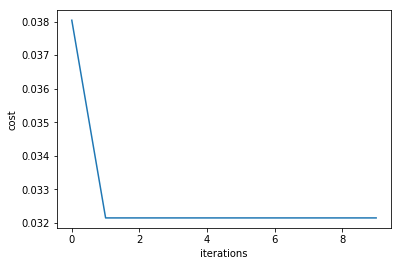

In [338]:
layer_dims = (6,10,10,1)
parameters = model(train_X.transpose(), train_Y,layer_dims , 2, num_iterations=5000)

In [339]:
result = predict(test_X.transpose(),test_Y,parameters)

In [340]:
result.mean()

0.40117460470434785